In [ ]:
#! pip install ipywidgets

In [7]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import warnings

In [2]:
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.model_selection import train_test_split

In [3]:
# initial setup
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150

plt.style.use('ggplot')
np.random.seed(0)
np.set_printoptions(precision=2, linewidth=100)
warnings.filterwarnings(action='ignore')

In [4]:
def f(x):
    return np.cos(1.5 * np.pi * x)

def generate_data(n_samples=30):
    x = np.sort(np.random.rand(n_samples))
    y = f(x) + 0.1 * np.random.randn(n_samples) 
    return x, y

def plot_coef(theta):
    plt.figure()
    plt.bar(np.arange(1, len(theta) + 1), height=np.abs(theta))
    plt.show()

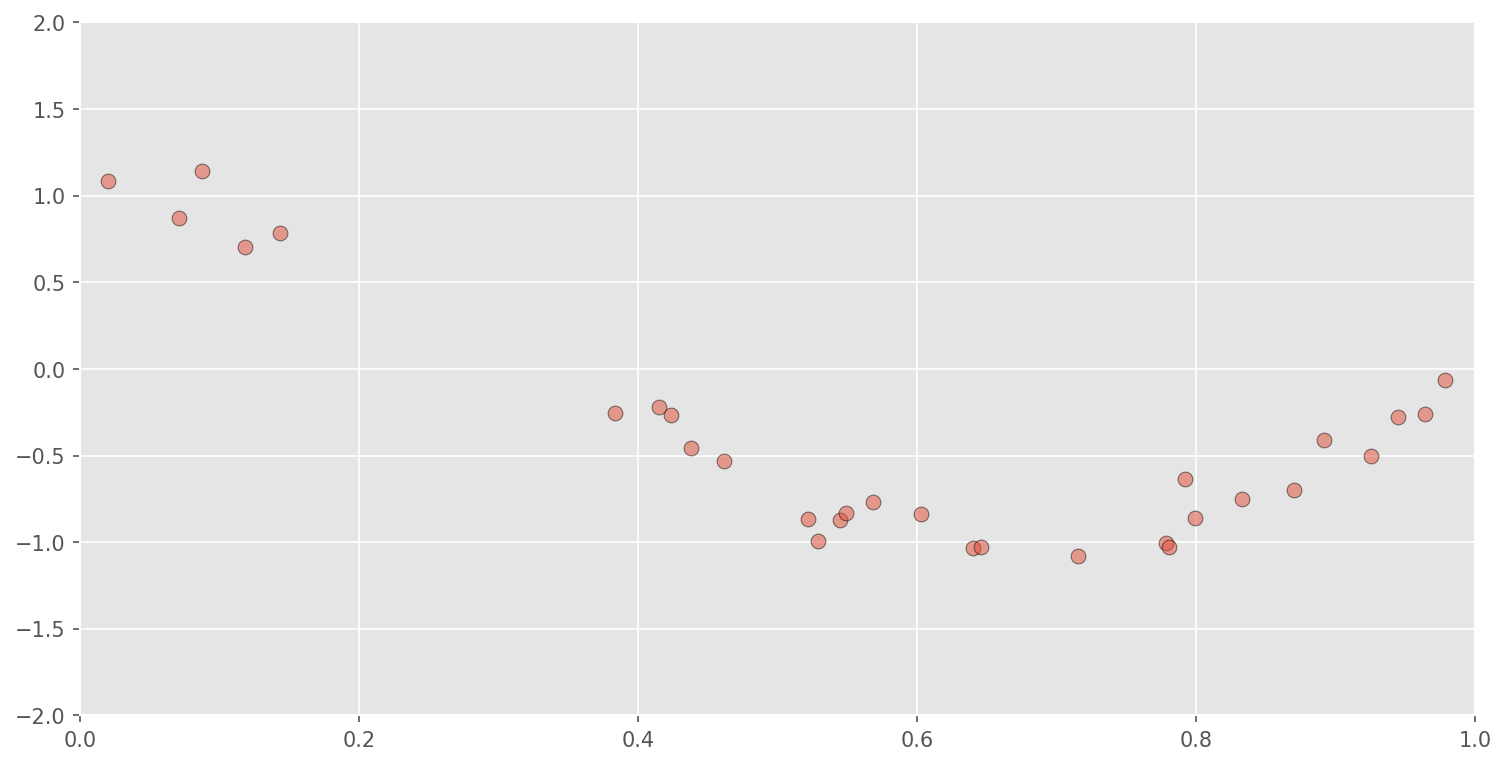

In [5]:
n_samples = 30 
x, y = generate_data(n_samples)
plt.figure()
plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

In [12]:
n_samples = 30 
x, y = generate_data(n_samples)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
xtrain_inx=np.argsort(X_train)
X_train=X_train[xtrain_inx]
y_train=y_train[xtrain_inx]



def update(value):
    
    
    
    poly = PolynomialFeatures(int(value),include_bias=False)    
    X_poly=poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly=poly.fit_transform(X_test.reshape(-1,1))
    theta=np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y_train
    print(theta)
   
   
    
    y_pred= theta@X_poly.T
    y_test_poly=theta@X_test_poly.T
    
    plt.figure(figsize=(10, 4), dpi=300)
    
    plt.plot(X_train,y_pred,c="black")   

    plt.scatter(X_train, y_train, s=50, color="red", alpha=0.5,label="Trian Data")
    plt.scatter(X_test, y_test, s=50, color="green", alpha=0.5,label="Test Data")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    
    mse_test=mean_squared_error(y_test,y_test_poly)
    #mse_test=r2_score(y_test,y_test_poly)
    mse_train=mean_squared_error(y_train,y_pred)
    #plt.title(f"MSE(Train):{mse_train:.4f} , MSE(Test):{mse_test:.4f}  ")
    plt.legend()
    plt.show()  
    plot_coef(theta)
    
                              
interact(update, value = widgets.IntSlider(value=1, min=1, max=20, step=1))




interactive(children=(IntSlider(value=1, description='value', max=20, min=1), Output()), _dom_classes=('widget…

<function __main__.update(value)>

In [296]:
def fit_poly(x, y, degree=1):
    
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

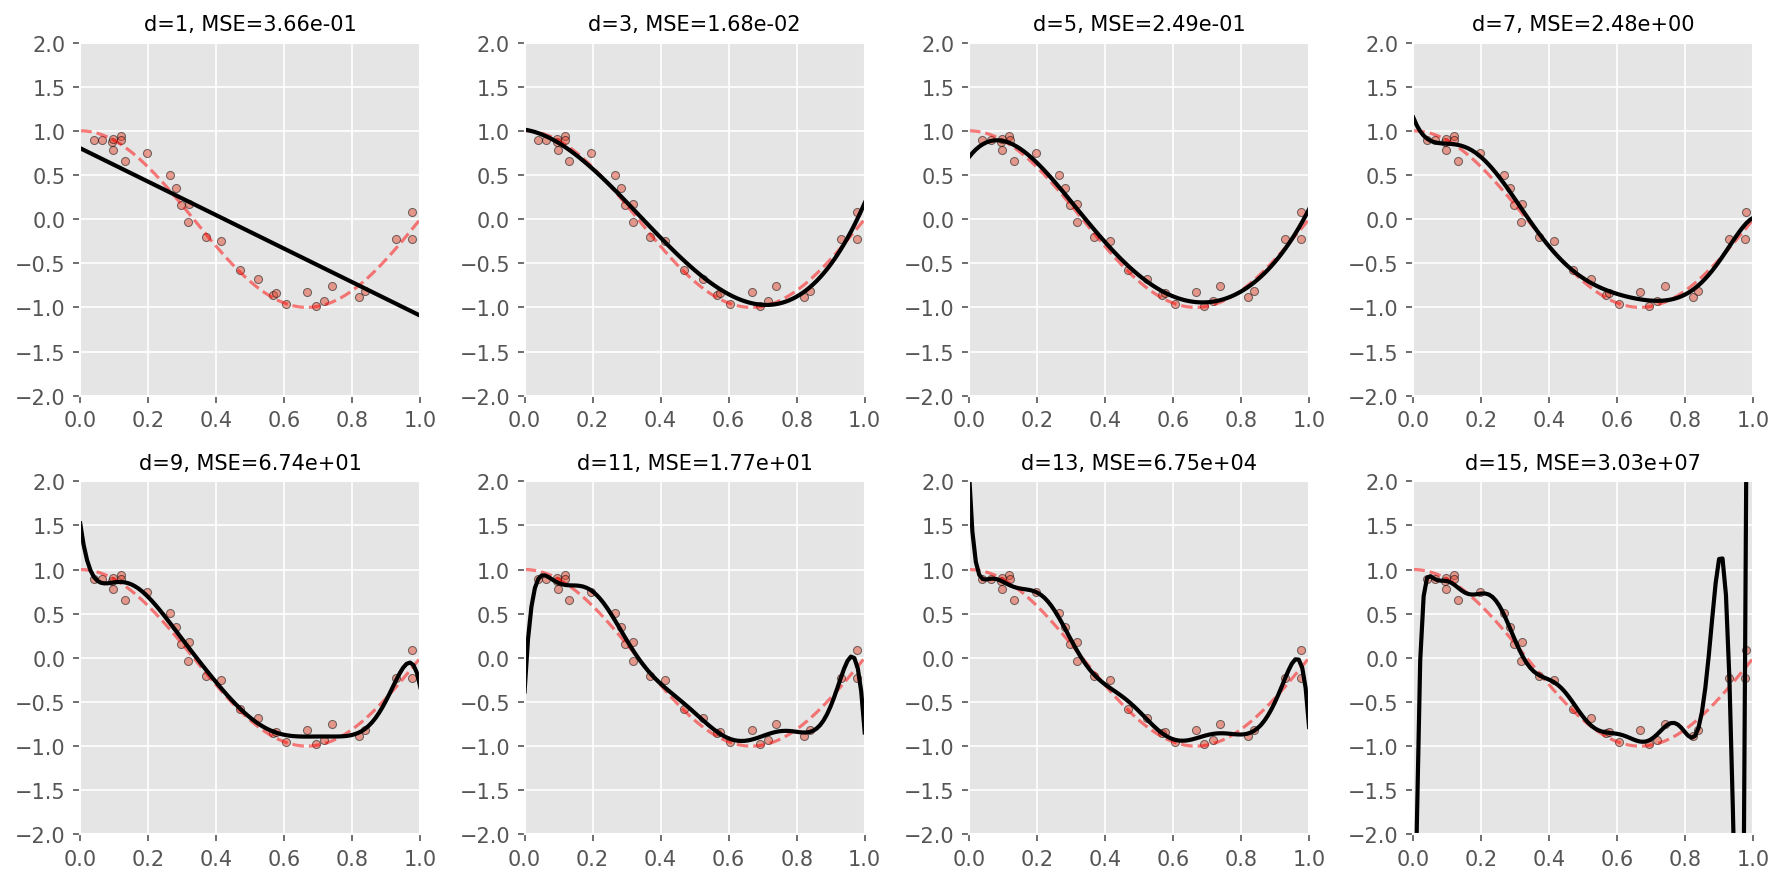

In [257]:
degrees = [1, 3, 5, 7, 9, 11, 13, 15]

plt.figure()

for d in degrees:
    model = fit_poly(x, y, degree=d)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, degrees.index(d) + 1)
    plt.tight_layout()
    
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

plt.show()

### Regularization

## L2 Regularization (Ridge)
$$ L_{2} = \lambda \sum_{i=1}^{n} \theta_i^2 $$

In [ ]:
   #lambda_value = 0.1
    #identity_matrix = np.eye(X_poly.shape[1])
    
    
    #theta=np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y_train
    #theta = np.linalg.inv(X_poly.T @ X_poly + lambda_value * identity_matrix) @ X_poly.T @ y_train

  

In [9]:
from sklearn.linear_model import Ridge
n_samples = 30 
x, y = generate_data(n_samples)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
xtrain_inx=np.argsort(X_train)
X_train=X_train[xtrain_inx]
y_train=y_train[xtrain_inx]



def update(value,alpha):
    alpha=float(alpha)
    
    
    poly = PolynomialFeatures(int(value),include_bias=False)    
    X_poly=poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly=poly.fit_transform(X_test.reshape(-1,1))
    
    ridge_model  = Ridge(alpha=alpha)
    ridge_model .fit(X_poly, y_train)
    
    y_pred= ridge_model.predict(X_poly)
    y_test_poly=ridge_model.predict(X_test_poly)
    print(f"{ridge_model.coef_},{ridge_model.intercept_} ")
    plt.figure(figsize=(10, 4), dpi=300)
    
    plt.plot(X_train,y_pred,c="black")   

    plt.scatter(X_train, y_train, s=50, color="red", alpha=0.5,label="Trian Data")
    plt.scatter(X_test, y_test, s=50, color="green", alpha=0.5,label="Test Data")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    
    mse_test=mean_squared_error(y_test,y_test_poly)
    mse_train=mean_squared_error(y_train,y_pred)
    plt.title(f"MSE(Test):{mse_test:.2f} , MSE(Train):{mse_train:.2f}")
    plt.legend()
    plt.show()  
    plot_coef(ridge_model.coef_)
    
                            
interact(update, value = widgets.IntSlider(value=1, min=1, max=20, step=1),alpha = widgets.Dropdown(
    options=['1.0','0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001', '0.0000001', '0.00000001'],
    value='0.1',
    description='Number:',
    disabled=False,
) )

interactive(children=(IntSlider(value=1, description='value', max=20, min=1), Dropdown(description='Number:', …

<function __main__.update(value, alpha)>

## L1 Regularization (Lasso)

$$ L_{1} = \lambda \sum_{i=1}^{n} |\theta_i| $$


In [8]:
from sklearn.linear_model import Lasso
n_samples = 30 
x, y = generate_data(n_samples)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
xtrain_inx=np.argsort(X_train)
X_train=X_train[xtrain_inx]
y_train=y_train[xtrain_inx]



def update(value,alpha):
    alpha=float(alpha)
    
    
    poly = PolynomialFeatures(int(value),include_bias=False)    
    X_poly=poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly=poly.fit_transform(X_test.reshape(-1,1))
    
    lasso_model  = Lasso(alpha=alpha)
    lasso_model .fit(X_poly, y_train)
    
    y_pred= lasso_model.predict(X_poly)
    y_test_poly=lasso_model.predict(X_test_poly)
    print(f"{lasso_model.coef_},{lasso_model.intercept_} ")
    plt.figure(figsize=(10, 4), dpi=300)
    
    plt.plot(X_train,y_pred,c="black")   

    plt.scatter(X_train, y_train, s=50, color="red", alpha=0.5,label="Trian Data")
    plt.scatter(X_test, y_test, s=50, color="green", alpha=0.5,label="Test Data")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    
    mse_test=mean_squared_error(y_test,y_test_poly)
    mse_train=mean_squared_error(y_train,y_pred)
    plt.title(f"MSE(Test):{mse_test:.2f} , MSE(Train):{mse_train:.2f}")
    plt.legend()
    plt.show()  
    plot_coef(lasso_model.coef_)
    
                             
interact(update, value = widgets.IntSlider(value=1, min=1, max=20, step=1),alpha = widgets.Dropdown(
    options=['1.0','0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001', '0.0000001', '0.00000001'],
    value='0.1',
    description='Number:',
    disabled=False,
) )

interactive(children=(IntSlider(value=1, description='value', max=20, min=1), Dropdown(description='Number:', …

<function __main__.update(value, alpha)>

## Elastic net (L1+L2) Regularization

$$ L_{\text{elastic net}} = \lambda_1 \sum_{i=1}^{n} |\theta_i| + \lambda_2 \sum_{i=1}^{n} \theta_i^2 $$


In [10]:
from sklearn.linear_model import ElasticNet

n_samples = 30 
x, y = generate_data(n_samples)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
xtrain_inx=np.argsort(X_train)
X_train=X_train[xtrain_inx]
y_train=y_train[xtrain_inx]



def update(value,alpha):
    alpha=float(alpha)
    
    
    poly = PolynomialFeatures(int(value),include_bias=False)    
    X_poly=poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly=poly.fit_transform(X_test.reshape(-1,1))
    
    elastic_model  = ElasticNet(alpha=alpha)
    elastic_model .fit(X_poly, y_train)
    
    y_pred= elastic_model.predict(X_poly)
    y_test_poly=elastic_model.predict(X_test_poly)
    print(f"{elastic_model.coef_},{elastic_model.intercept_} ")
    plt.figure(figsize=(10, 4), dpi=300)
    
    plt.plot(X_train,y_pred,c="black")   

    plt.scatter(X_train, y_train, s=50, color="red", alpha=0.5,label="Trian Data")
    plt.scatter(X_test, y_test, s=50, color="green", alpha=0.5,label="Test Data")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    
    mse_test=mean_squared_error(y_test,y_test_poly)
    mse_train=mean_squared_error(y_train,y_pred)
    plt.title(f"MSE(Test):{mse_test:.2f} , MSE(Train):{mse_train:.2f}")
    plt.legend()
    plt.show()  
    plot_coef(elastic_model.coef_)
    
                            
interact(update, value = widgets.IntSlider(value=1, min=1, max=20, step=1),alpha = widgets.Dropdown(
    options=['0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001', '0.0000001', '0.00000001'],
    value='0.1',
    description='Number:',
    disabled=False,
) )

interactive(children=(IntSlider(value=1, description='value', max=20, min=1), Dropdown(description='Number:', …

<function __main__.update(value, alpha)>

## Train , Test Split

In [11]:
from sklearn.model_selection import train_test_split

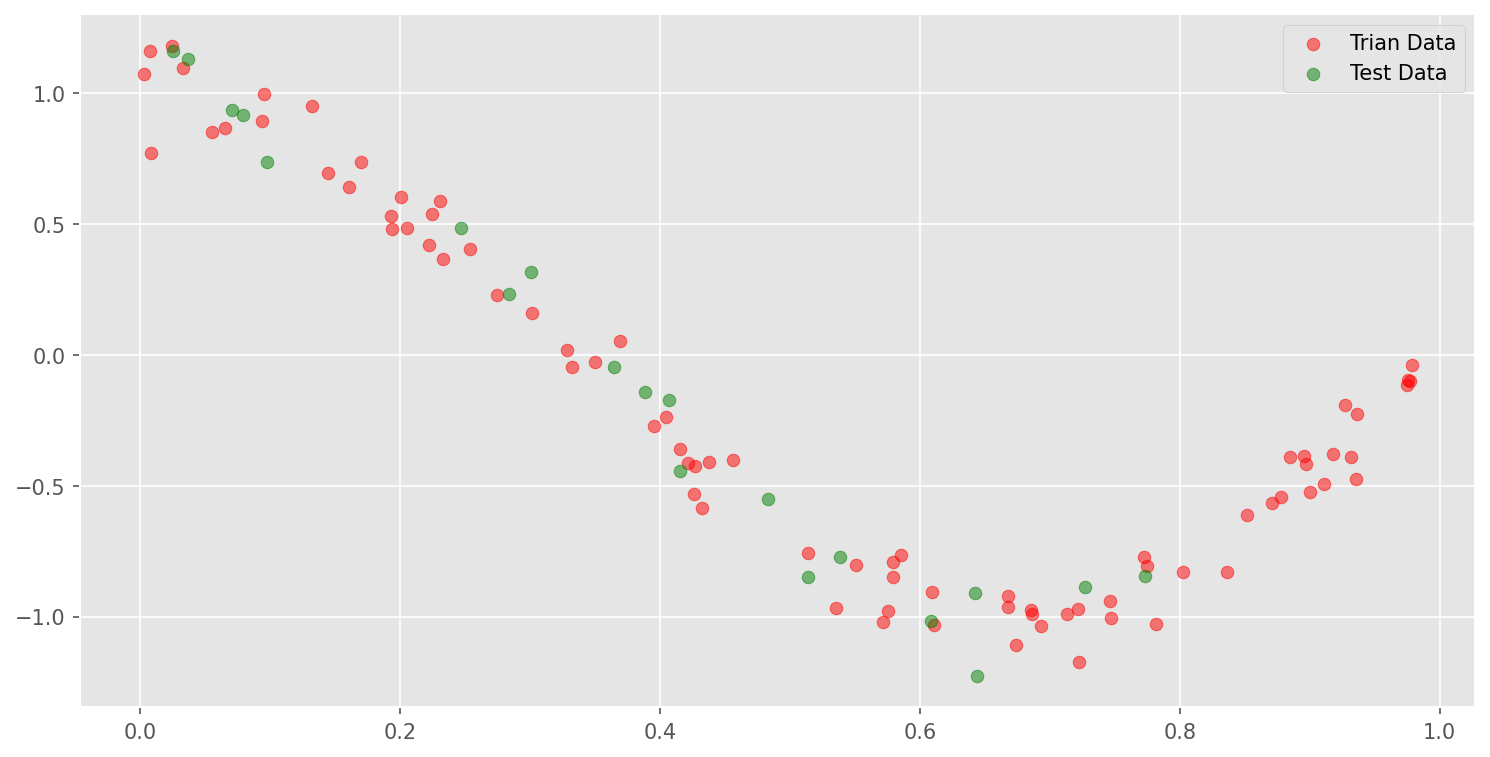

In [13]:
n_samples = 100 
x, y = generate_data(n_samples)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

plt.scatter(X_train, y_train,  color="red", alpha=0.5,label="Trian Data")
plt.scatter(X_test, y_test,  color="green", alpha=0.5,label="Test Data")

plt.legend()
plt.show()


In [14]:
print(f"Train size: {len(X_train)} , Test size :{len(X_test)}")

Train size: 80 , Test size :20


## Метод наименьших квадратов (Least squares)


In [15]:
from sympy import *
x = Symbol('x')
y = x**2 + 1
yprime = y.diff(x)
display(yprime)
f = lambdify(x, yprime, 'numpy')
f(np.ones(5))

2*x

array([2., 2., 2., 2., 2.])

In [16]:
t0, t1, n,i = symbols('theta_0 theta_1 n i')
y=IndexedBase("y")
x=IndexedBase("x")
#J=Sum((y[i]-t0+t1*x[i])**2,(i,1,n))
J = Sum((y[i] - (t0 + t1 * x[i]))**2, (i, 1, n))
dt0 = simplify(J.diff(t0))
dt1 = simplify(J.diff(t1))

initial_guess = [0, 0]

eq1 = Eq(dt0,0)
eq2 = Eq(dt1,0)

display(eq1)

Eq(2*Sum(theta_0 + theta_1*x[i] - y[i], (i, 1, n)), 0)

In [17]:
from sympy import symbols, Eq, nsolve, diff, summation
import numpy as np


t0, t1 = symbols('theta_0 theta_1')
n = 3  

x_vals = np.array([1, 2, 3])
y_vals = np.array([2, 3, 5])

J = sum((y_vals[i] - t0 + t1 * x_vals[i])**2 for i in range(n))

dt0 = diff(J, t0)
dt1 = diff(J, t1)

eq1 = Eq(dt0, 0)
eq2 = Eq(dt1, 0)

initial_guess = [0, 0]

numerical_solution = nsolve((eq1, eq2), (t0, t1), initial_guess)
print(numerical_solution)


Matrix([[0.333333333333333], [-1.50000000000000]])


In [18]:
from sympy import symbols, Eq, nsolve, diff
import numpy as np

X_vals = np.array([[1, 2], [5, 3], [4, 4]])  
y_vals = np.array([7, 8, 10])


m = X_vals.shape[1]
n = X_vals.shape[0]

params = symbols(f'theta_0:{m+1}')  
t0, t1, t2 = params  


J = sum((y_vals[i] - (t0 + sum(params[j + 1] * X_vals[i, j] for j in range(m))))**2 for i in range(n))


derivatives = [diff(J, param) for param in params]


equations = [Eq(derivatives[j], 0) for j in range(m + 1)]  


initial_guess = [0] * (m + 1)


numerical_solution = nsolve(equations, params, initial_guess)
print(numerical_solution)


Matrix([[3.60000000000000], [-0.200000000000000], [1.80000000000000]])


In [84]:
from sympy import symbols, Eq, nsolve, diff
import numpy as np

X_vals = np.array([[1, 2], [5, 3], [4, 4]])  
y_vals = np.array([7, 8, 10])

m = X_vals.shape[1]
n=X_vals.shape[0]

params = symbols(f'theta_0:{m+1}')  
t0, t1, t2 = params  

J = sum((y_vals[i] - (t0 + sum(params[j + 1] * X_vals[i, j] for j in range(m))))**2 for i in range(n))
#lambda_val = 0.1  
#J += lambda_val * sum(params[j]**2 for j in range(1, m+1))  


derivatives = [diff(J, param) for param in params]


equations = [Eq(derivatives[j], 0) for j in range(m + 1)]  


initial_guess = [0] * (m + 1)


numerical_solution = nsolve(equations, params, initial_guess)
print(numerical_solution)


Matrix([[3.60000000000000], [-0.200000000000000], [1.80000000000000]])


## Нормальные уравнения (Normal equation)


In [ ]:
theta=np.linalg.inv(X.T @ X) @ X.T @ Y

## Градиентный спуск (Gradient descent)


In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

## Constant

In [21]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, learning_rate='constant',eta0=0.01)
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[-0.16 -0.19 -0.11  0.14 -0.21] , [0.23]
Среднеквадратичная ошибка: 1.1800073586809139


## Invscaling

$$ \eta(t) = \frac{\eta_0}{t^{power\_t}} $$


In [119]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, learning_rate='invscaling',eta0=0.01,power_t=0.25)
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[-0.02 -0.06 -0.28 -0.08 -0.32] , [0.06]
1.292506387860942


## Adaptive

In [22]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, learning_rate='constant',eta0=0.01)
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[-0.03  0.01 -0.05 -0.01 -0.24] , [0.11]
Среднеквадратичная ошибка: 1.1597795821477572


## Optimal Adagrad 

In [117]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, learning_rate="optimal")
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[ 2.43e+12 -3.56e+12 -6.80e+12 -1.06e+13  2.51e+12] , [-1.11e+12]
1.2563800252922953e+26


## SGD


In [125]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=1)
n_iterations = 100
for t in range(1, n_iterations + 1):
    model.partial_fit(X_train, y_train)

    
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 0.9708506681923694


In [127]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=1,eta0=1.0)

def custom_learning_rate(t):
    return 1.0 / t

n_iterations = 1000
for t in range(1, n_iterations + 1):
    model.eta0 = custom_learning_rate(t)
    model.partial_fit(X_train, y_train)

    
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 1.2316599593100799


## Масштабирование данных (Data Scaling)


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X = [[1, 2], [2, 3], [4, 5], [5, 6], [7, 8]]
y = [1, 2, 3, 4, 5]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_train_scaled

array([[-1.31, -1.31],
       [-0.84, -0.84],
       [ 0.09,  0.09],
       [ 0.56,  0.56],
       [ 1.5 ,  1.5 ]])

In [25]:
from sklearn.preprocessing import MinMaxScaler

X = [[1, 2], [2, 3], [4, 5], [5, 6], [7, 8]]
y = [1, 2, 3, 4, 5]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X)
X_train_scaled

array([[0.  , 0.  ],
       [0.17, 0.17],
       [0.5 , 0.5 ],
       [0.67, 0.67],
       [1.  , 1.  ]])

In [26]:
from sklearn.preprocessing import MaxAbsScaler

X = [[1, 2], [2, 3], [4, 5], [5, 6], [7, 8]]
y = [1, 2, 3, 4, 5]

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X)
X_train_scaled

array([[0.14, 0.25],
       [0.29, 0.38],
       [0.57, 0.62],
       [0.71, 0.75],
       [1.  , 1.  ]])

## Polynomial

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X = [[1, 2], [2, 3], [4, 5], [5, 6], [7, 8]]

poly= PolynomialFeatures(3)
X_new = poly.fit_transform(X)
X_new

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.],
       [  1.,   7.,   8.,  49.,  56.,  64., 343., 392., 448., 512.]])

## SGD with L1

In [29]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, alpha=0.00001,penalty="l1")
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[-0.11  0.05 -0.17 -0.13 -0.09] , [0.08]
Среднеквадратичная ошибка: 0.9150313964939651


## SGD with L2

In [113]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, alpha=0.00001,penalty="elasticnet",l1_ratio=0.5)
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[ 0.01  0.03 -0.09 -0.12 -0.05] , [-0.02]
1.1333681162368237


## Elastic Net 

In [ ]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, alpha=0.00001,penalty="l2")
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")